### Contagem das palavras mais usadas no Plano de governo do Partido Novo

#### Importacao de bibliotecas

In [2]:
import pandas as pd
import numpy as np
# http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction
from sklearn.feature_extraction.text import CountVectorizer
import string
from nltk.corpus import stopwords
from nltk import *
from matplotlib import pyplot as plt
%matplotlib inline

### Link do plano de governo

- [Plano de governo](http://joaoamoedo.com.br/programa-de-governo/)

### Conversao pdf to text

- Utilizei esse site on-line [https://pdftotext.com/](https://pdftotext.com/)

### Leitura do arquivo transformado em texto do original em pdf

In [3]:
with open('text/plano_governo_joaoamoedo.txt', 'r', encoding='UTF-8') as pl:
    big_string = ''
    for line in pl:
        split_line = line.split(' ')
        for word in split_line:
            big_string = big_string + ' ' + word

In [4]:
# criacao de lista de simbolos de pontuacao
punctuation = string.punctuation

In [5]:
# removendo quebras de linha '\n'
big_string = big_string.replace('\n ', ' ')

In [6]:
# retirando pontuacao
for p in punctuation:
    big_string = big_string.replace(p, '')

In [7]:
# convertendo tudo para lower case
big_string = big_string.lower()

In [8]:
# checando a conversao
big_string[0:1000]

' 8162018  programa de governo  joão amoêdo  nosso grande sonho  nossa motivação  “um brasil seguro simples e livre onde todos possam chegar lá”  o que nos move é o senso de responsabilidade com o país e as próximas gerações  \uf03a  nossas bandeiras 1 oportunidades para que todos os brasileiros possam trabalhar empreender e viver cada vez melhor 2 educação de qualidade e conhecimento para que as crianças e os jovens possam construir seu futuro em um mundo em transformação 3 respeito à vida e segurança para todos os brasileiros em todo o território 4 saúde acessível com um novo modelo que trate a todos com dignidade 5 proteção social como um caminho para a cidadania plena e fim da pobreza 6 qualidade e representatividade política com ética e transparência sem privilégios e corrupção httpjoaoamoedocombrprogramadegoverno  \uf106 114  \x0c8162018  programa de governo  joão amoêdo 7 governo responsável simples e digital que funcione para o cidadão para o trabalhador e para o empreendedor  

In [9]:
# comprimento da string
len(big_string)

28817

In [10]:
# nltk.download() # rodar apenas uma vez para baixar os pacotes

In [11]:
# lista de stopwords em portugues
stop_words = stopwords.words('portuguese')

In [12]:
# numero de stopwords
len(stop_words)

203

In [13]:
# aparando os detalhes
full_text = big_string
for s_word in stop_words:
    s_word = ' ' + s_word + ' '
    full_text = full_text.replace(s_word, ' ')
    full_text = full_text.replace(' é ', ' ')
    full_text = full_text.replace(' – ', ' ')
    full_text = full_text.replace(' • ', ' ')
    #full_text = full_text.replace('  ', ' ')
    full_text = full_text.replace('httpjoaoamoedocombrprogramadegoverno', '')
    full_text = full_text.replace('httpjoaoamoedocombr', '')
    full_text = full_text.replace('\x0c8162018', '')
    full_text = full_text.replace('\uf106', '')

In [14]:
# tamanho do texto apos limpeza
len(full_text)

21790

In [15]:
# quantidade de caracteres removidos
len(big_string)-len(full_text)

7027

In [16]:
# transformando a string em lista
full_text = [full_text]

In [17]:
# separando palavra por palavra
freq_full_text = full_text[0].split(' ')

### Documentacao FreqDist

- [FreqDist](http://www.nltk.org/api/nltk.html?highlight=freqdist)

In [18]:
# Contando a frequencia de cada palavra com a funcao FreqDist
freq_full_text = FreqDist(freq_full_text)

In [19]:
# as 100 palavras mais comuns
hundred_most_common = freq_full_text.most_common(100)
# removendo primeiro elemento da lista ''
hundred_most_common = hundred_most_common[1:]
# imprime as 10 primeiras
hundred_most_common[:29]

[('brasil', 39),
 ('país', 26),
 ('governo', 25),
 ('todos', 20),
 ('brasileiros', 20),
 ('estado', 18),
 ('vamos', 18),
 ('programa', 17),
 ('queremos', 17),
 ('educação', 16),
 ('joão', 15),
 ('amoêdo', 15),
 ('vida', 14),
 ('livre', 13),
 ('cada', 13),
 ('mundo', 13),
 ('pobreza', 13),
 ('brasileiro', 13),
 ('onde', 12),
 ('qualidade', 12),
 ('política', 12),
 ('menos', 12),
 ('visão', 12),
 ('simples', 11),
 ('novo', 11),
 ('redução', 11),
 ('longo', 11),
 ('prazo', 11),
 ('propostas', 11)]

In [20]:
# 
x = []
y = []
for i in hundred_most_common[0:29]:
    x.append(i[0])
    y.append(i[1])

In [30]:
d = {'palavra': x, 'frequencia': y}
df_r = pd.DataFrame(d)
df_r = df_r.sort_values(['frequencia'], ascending=0)
df_r

,frequencia,palavra
0,39,brasil
1,26,país
2,25,governo
3,20,todos
4,20,brasileiros
5,18,estado
6,18,vamos
7,17,programa
8,17,queremos
9,16,educação


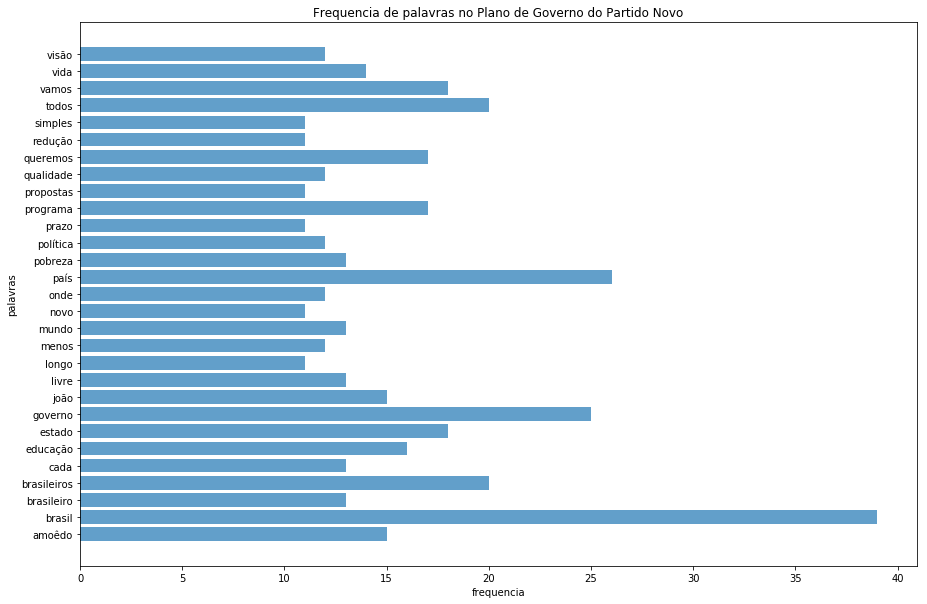

In [32]:
plt.figure(figsize=(15,10))
plt.barh(df_r.palavra, df_r.frequencia, align='center', alpha=0.7)
plt.title("Frequencia de palavras no Plano de Governo do Partido Novo")
#plt.xticks(rotation=90)
plt.xlabel('frequencia')
plt.ylabel('palavras')
plt.show()


In [79]:
# Lista completa das 100 mais frequentes
hundred_most_common

[('brasil', 39),
 ('país', 26),
 ('governo', 25),
 ('todos', 20),
 ('brasileiros', 20),
 ('estado', 18),
 ('vamos', 18),
 ('programa', 17),
 ('queremos', 17),
 ('educação', 16),
 ('joão', 15),
 ('amoêdo', 15),
 ('vida', 14),
 ('livre', 13),
 ('cada', 13),
 ('mundo', 13),
 ('pobreza', 13),
 ('brasileiro', 13),
 ('onde', 12),
 ('qualidade', 12),
 ('política', 12),
 ('menos', 12),
 ('visão', 12),
 ('simples', 11),
 ('novo', 11),
 ('redução', 11),
 ('longo', 11),
 ('prazo', 11),
 ('propostas', 11),
 ('possam', 10),
 ('fim', 10),
 ('cidadão', 10),
 ('recursos', 10),
 ('trabalhar', 9),
 ('melhor', 9),
 ('todo', 9),
 ('saúde', 9),
 ('privilégios', 9),
 ('públicos', 9),
 ('anos', 9),
 ('setor', 9),
 ('responsabilidade', 8),
 ('gerações', 8),
 ('segurança', 8),
 ('impostos', 8),
 ('fazer', 8),
 ('precisa', 8),
 ('pessoas', 8),
 ('políticos', 8),
 ('sociedade', 8),
 ('países', 8),
 ('ensino', 8),
 ('gestão', 8),
 ('público', 8),
 ('seguro', 7),
 ('oportunidades', 7),
 ('vez', 7),
 ('base', 7),
 

In [80]:
words = []
for i in hundred_most_common:
    words.append(i[0])
words[:9]

['brasil',
 'país',
 'governo',
 'todos',
 'brasileiros',
 'estado',
 'vamos',
 'programa',
 'queremos']

In [81]:
text = full_text[0].split(' ')
freq_exp = {}
for i in range(len(words)):
    for j in range(len(text)):
        if words[i] == text[j]:
            if text[j-1]:
                if text[j+1] == '':
                    string = text[j-1] + ' ' + text[j] + ' ' + text[j+2]
                else:
                    string = text[j-1] + ' ' + text[j] + ' ' + text[j+1]
                if not string in freq_exp:
                    freq_exp[string] = 1
                else:
                    freq_exp[string] = freq_exp[string] + 1

In [82]:
# lista das expressoes mais frequentes no texto que usam palavras mais frequentes (lista anterior)
for key, value in freq_exp.items():
    if value >=3:
        print(key, value)

programa governo joão 14
onde todos possam 5
joão amoêdo  4
simples livre onde 6
livre onde todos 5
país onde todos 4
seguro simples livre 5
responsável simples digital 3
longo prazo reduzir 3
todos possam chegar 5
funcione cidadão trabalhador 3
brasil seguro simples 4
possam chegar lá 4
educação básica qualidade 3
